In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import seaborn as sns

In [2]:
data = pd.read_csv('all_data_kmeans.csv')
data.head()

,country,1965.0_renewable,1966.0_renewable,1967.0_renewable,1968.0_renewable,1969.0_renewable,1970.0_renewable,1971.0_renewable,1972.0_renewable,1973.0_renewable,...,2010.0_co2_emission,2011.0_co2_emission,2012.0_co2_emission,2013.0_co2_emission,2014.0_co2_emission,2015.0_co2_emission,2016.0_co2_emission,2017.0_co2_emission,2018.0_co2_emission,2019.0_co2_emission
0,Canada,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,530.094931,541.020754,526.312965,544.096067,553.458312,546.233373,537.777358,549.107572,565.635679,556.188552
1,Mexico,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001610,...,442.611064,465.846905,473.972290,472.839136,459.630951,463.121335,468.791476,476.945856,466.575628,454.972919
2,US,0.133322,0.14062,0.140736,0.15546,0.162271,0.162359,0.165844,0.186730,0.199897,...,5485.715925,5336.435925,5089.974540,5249.595898,5254.565096,5141.406746,5042.431426,4983.869718,5116.785715,4964.693088
3,Argentina,0.000000,0.00000,0.000000,0.00000,0.000000,0.000475,0.000499,0.000644,0.000490,...,166.000124,168.746975,175.268259,182.764622,182.745499,186.021818,185.762130,182.807827,180.394930,174.877271
4,Brazil,0.000000,0.00000,0.000000,0.00000,0.000000,0.009260,0.012012,0.015906,0.014416,...,398.324213,423.761618,442.858031,482.871255,503.779772,487.040178,450.367978,457.229289,442.250684,441.299916


In [3]:
df1 = data[['2019.0_renewable']]
df2 = data[['2019.0_oil']]
df3 = data[['2019.0_gas']]
df4 = data[['2019.0_nuclear']]
df5 = data[['2019.0_hydroelec']]
df6 = data[['2019.0_coal']]
df7 = data[['2019.0_co2_emission']]

In [4]:
merge2 = pd.concat([df1, df2], axis=1)
merge3 = pd.concat([merge2, df3], axis=1)
merge4 = pd.concat([merge3, df4], axis=1)
merge5 = pd.concat([merge4, df5], axis=1)
merge6 = pd.concat([merge5, df6], axis=1)
merge7 = pd.concat([merge6, df7], axis=1)

merge7

,2019.0_renewable,2019.0_oil,2019.0_gas,2019.0_nuclear,2019.0_hydroelec,2019.0_coal,2019.0_co2_emission
0,0.523399,4.499921,4.331249,0.895769,3.405087,0.558633,556.188552
1,0.345292,3.291532,3.264027,0.100298,0.212077,0.507516,454.972919
2,5.828555,36.988039,30.479222,7.595138,2.417207,11.340643,4964.693088
3,0.138995,1.185580,1.709661,0.075254,0.330427,0.022852,174.877271
4,2.024106,4.730524,1.289142,0.144099,3.559486,0.656077,441.299916
...,...,...,...,...,...,...,...
77,0.289421,5.304121,2.014814,1.301410,0.024743,3.436316,638.610692
78,0.007367,0.245188,0.000000,0.000000,0.043028,0.063041,23.414519
79,0.071299,1.933706,0.837354,0.288143,0.049423,1.630500,278.616755
80,0.290979,2.723070,1.829973,0.000000,0.056249,0.713991,301.677662


In [5]:
rename_cols = merge7.rename(columns = lambda x: x.strip('2019.0_'))
rename_cols

,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission
0,0.523399,4.499921,4.331249,0.895769,3.405087,0.558633,556.188552
1,0.345292,3.291532,3.264027,0.100298,0.212077,0.507516,454.972919
2,5.828555,36.988039,30.479222,7.595138,2.417207,11.340643,4964.693088
3,0.138995,1.185580,1.709661,0.075254,0.330427,0.022852,174.877271
4,2.024106,4.730524,1.289142,0.144099,3.559486,0.656077,441.299916
...,...,...,...,...,...,...,...
77,0.289421,5.304121,2.014814,1.301410,0.024743,3.436316,638.610692
78,0.007367,0.245188,0.000000,0.000000,0.043028,0.063041,23.414519
79,0.071299,1.933706,0.837354,0.288143,0.049423,1.630500,278.616755
80,0.290979,2.723070,1.829973,0.000000,0.056249,0.713991,301.677662


In [6]:
df = data[['country']]
df

,country
0,Canada
1,Mexico
2,US
3,Argentina
4,Brazil
...,...
77,South Korea
78,Sri Lanka
79,Taiwan
80,Thailand


In [7]:
merge_2019 = pd.concat([df, rename_cols], axis=1)
merge_2019

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission
0,Canada,0.523399,4.499921,4.331249,0.895769,3.405087,0.558633,556.188552
1,Mexico,0.345292,3.291532,3.264027,0.100298,0.212077,0.507516,454.972919
2,US,5.828555,36.988039,30.479222,7.595138,2.417207,11.340643,4964.693088
3,Argentina,0.138995,1.185580,1.709661,0.075254,0.330427,0.022852,174.877271
4,Brazil,2.024106,4.730524,1.289142,0.144099,3.559486,0.656077,441.299916
...,...,...,...,...,...,...,...,...
77,South Korea,0.289421,5.304121,2.014814,1.301410,0.024743,3.436316,638.610692
78,Sri Lanka,0.007367,0.245188,0.000000,0.000000,0.043028,0.063041,23.414519
79,Taiwan,0.071299,1.933706,0.837354,0.288143,0.049423,1.630500,278.616755
80,Thailand,0.290979,2.723070,1.829973,0.000000,0.056249,0.713991,301.677662


In [8]:
merge_2019['renewable_percent'] = (merge_2019['renewable'] / merge_2019['renewable'].sum()) * 100

merge_2019['oil_percent'] = (merge_2019['oil'] / merge_2019['oil'].sum()) * 100

merge_2019['gas_percent'] = (merge_2019['gas'] / merge_2019['gas'].sum()) * 100

merge_2019['nuclear_percent'] = (merge_2019['nuclear'] / merge_2019['nuclear'].sum()) * 100

merge_2019['hydroelec_percent'] = (merge_2019['hydroelec'] / merge_2019['hydroelec'].sum()) * 100

merge_2019['coal_percent'] = (merge_2019['coal'] / merge_2019['coal'].sum()) * 100

merge_2019['co2_percent'] = (merge_2019['co2_emission'] / merge_2019['co2_emission'].sum()) * 100

merge_2019

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,Canada,0.523399,4.499921,4.331249,0.895769,3.405087,0.558633,556.188552,1.820762,2.499737,3.520809,3.887601,9.979605,0.368420,1.749136
1,Mexico,0.345292,3.291532,3.264027,0.100298,0.212077,0.507516,454.972919,1.201176,1.828469,2.653280,0.435287,0.621554,0.334708,1.430827
2,US,5.828555,36.988039,30.479222,7.595138,2.417207,11.340643,4964.693088,20.275943,20.547112,24.776118,32.962588,7.084333,7.479184,15.613276
3,Argentina,0.138995,1.185580,1.709661,0.075254,0.330427,0.022852,174.877271,0.483524,0.658598,1.389759,0.326600,0.968414,0.015071,0.549965
4,Brazil,2.024106,4.730524,1.289142,0.144099,3.559486,0.656077,441.299916,7.041310,2.627839,1.047925,0.625386,10.432115,0.432684,1.387827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,South Korea,0.289421,5.304121,2.014814,1.301410,0.024743,3.436316,638.610692,1.006817,2.946476,1.637813,5.648067,0.072516,2.266260,2.008343
78,Sri Lanka,0.007367,0.245188,0.000000,0.000000,0.043028,0.063041,23.414519,0.025628,0.136203,0.000000,0.000000,0.126105,0.041575,0.073635
79,Taiwan,0.071299,1.933706,0.837354,0.288143,0.049423,1.630500,278.616755,0.248029,1.074187,0.680673,1.250530,0.144849,1.075319,0.876211
80,Thailand,0.290979,2.723070,1.829973,0.000000,0.056249,0.713991,301.677662,1.012236,1.512684,1.487559,0.000000,0.164855,0.470879,0.948735


In [9]:
merge_2019.fillna(0)
merge_2019.isna().sum()

country              0
renewable            1
oil                  1
gas                  1
nuclear              1
hydroelec            1
coal                 1
co2_emission         1
renewable_percent    1
oil_percent          1
gas_percent          1
nuclear_percent      1
hydroelec_percent    1
coal_percent         1
co2_percent          1
dtype: int64

In [10]:
null_columns=merge_2019.columns[merge_2019.isnull().any()]
merge_2019[null_columns].isnull().sum()
print(merge_2019[merge_2019["renewable"].isnull()][null_columns])

    renewable  oil  gas  nuclear  hydroelec  coal  co2_emission  \
49        NaN  NaN  NaN      NaN        NaN   NaN           NaN   

    renewable_percent  oil_percent  gas_percent  nuclear_percent  \
49                NaN          NaN          NaN              NaN   

    hydroelec_percent  coal_percent  co2_percent  
49                NaN           NaN          NaN  


In [11]:
merge_2019.loc[[49]]

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
49,USSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
merge_2019 = merge_2019.drop([49])

In [13]:
selected_data = merge_2019.iloc[:, [0, 8, 9, 10, 11, 12, 13, 14]]
selected_data

,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,Canada,1.820762,2.499737,3.520809,3.887601,9.979605,0.368420,1.749136
1,Mexico,1.201176,1.828469,2.653280,0.435287,0.621554,0.334708,1.430827
2,US,20.275943,20.547112,24.776118,32.962588,7.084333,7.479184,15.613276
3,Argentina,0.483524,0.658598,1.389759,0.326600,0.968414,0.015071,0.549965
4,Brazil,7.041310,2.627839,1.047925,0.625386,10.432115,0.432684,1.387827
...,...,...,...,...,...,...,...,...
77,South Korea,1.006817,2.946476,1.637813,5.648067,0.072516,2.266260,2.008343
78,Sri Lanka,0.025628,0.136203,0.000000,0.000000,0.126105,0.041575,0.073635
79,Taiwan,0.248029,1.074187,0.680673,1.250530,0.144849,1.075319,0.876211
80,Thailand,1.012236,1.512684,1.487559,0.000000,0.164855,0.470879,0.948735


In [14]:
selected_data.describe()

,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1.234568,1.234568,1.234568,1.234568,1.234568,1.234568,1.234568
std,3.546433,2.903601,2.991134,4.309431,4.032382,6.149077,3.866528
min,0.000116,0.022454,0.000000,0.000000,0.000000,0.000000,0.010240
25%,0.031145,0.203225,0.125339,0.000000,0.021504,0.015071,0.135155
50%,0.194767,0.389781,0.513341,0.000000,0.178525,0.082993,0.321988
75%,0.764772,1.085646,1.271068,0.599160,0.756696,0.368420,0.898996
max,23.055471,20.547112,24.776118,32.962588,33.171757,53.864746,30.900794


In [15]:
# list(selected_data['country'])

In [16]:
desired_values = selected_data[(selected_data['renewable_percent'] < 4) & (selected_data['oil_percent']<4) & (selected_data['gas_percent'] < 4)&(selected_data['nuclear_percent'] < 4)&
              (selected_data['hydroelec_percent'] < 4)& (selected_data['coal_percent'] < 4) & (selected_data['co2_percent'])]

In [17]:
 desired_values.describe()

,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,0.412040,0.556038,0.629628,0.288641,0.426573,0.258342,0.447992
std,0.653589,0.623719,0.716229,0.660094,0.627546,0.495671,0.451629
min,0.000116,0.022454,0.000000,0.000000,0.000000,0.000000,0.010240
25%,0.027561,0.181868,0.092832,0.000000,0.008752,0.012860,0.120414
50%,0.158282,0.315306,0.318532,0.000000,0.152608,0.055867,0.290458
75%,0.515691,0.757095,1.031064,0.188237,0.632968,0.179897,0.653729
max,3.757437,3.846430,3.325673,3.211204,3.272476,2.515214,1.987821


In [18]:
# list(desired_values['country'])

In [19]:
removed_countries = selected_data[~selected_data.country.isin(desired_values['country'])]
removed_countries

,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,Canada,1.820762,2.499737,3.520809,3.887601,9.979605,0.368420,1.749136
2,US,20.275943,20.547112,24.776118,32.962588,7.084333,7.479184,15.613276
4,Brazil,7.041310,2.627839,1.047925,0.625386,10.432115,0.432684,1.387827
22,France,2.136020,1.749509,1.271068,15.453378,1.528868,0.177865,0.941078
23,Germany,7.366041,2.598430,2.594443,2.904359,0.527549,1.519494,2.150351
51,Iran,0.017134,2.178503,6.543940,0.248015,0.756696,0.034115,2.109296
68,China,23.055471,15.502003,8.993773,13.490520,33.171757,53.864746,30.900794
69,India,4.200580,5.687359,1.746493,1.747264,4.228460,12.279931,7.800373
71,Japan,3.825089,4.184342,3.164045,2.539328,1.931431,3.235004,3.532073
77,South Korea,1.006817,2.946476,1.637813,5.648067,0.072516,2.266260,2.008343


In [20]:
removed_countries.to_csv('excluded_equal_greaterthan_4percent_2019.csv', index=False)

In [21]:
 desired_values = desired_values.reset_index()

In [22]:
 desired_values.isnull().sum()

index                0
country              0
renewable_percent    0
oil_percent          0
gas_percent          0
nuclear_percent      0
hydroelec_percent    0
coal_percent         0
co2_percent          0
dtype: int64

In [23]:
desired_values

,index,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,1,Mexico,1.201176,1.828469,2.653280,0.435287,0.621554,0.334708,1.430827
1,3,Argentina,0.483524,0.658598,1.389759,0.326600,0.968414,0.015071,0.549965
2,5,Chile,0.669602,0.421959,0.189669,0.000000,0.544803,0.187647,0.290458
3,6,Colombia,0.074179,0.389781,0.393495,0.000000,1.346608,0.169958,0.316478
4,7,Ecuador,0.025358,0.274628,0.018496,0.000000,0.644383,0.000000,0.111964
...,...,...,...,...,...,...,...,...,...
66,76,Singapore,0.029494,1.697828,0.372854,0.000000,0.000000,0.017245,0.688333
67,78,Sri Lanka,0.025628,0.136203,0.000000,0.000000,0.126105,0.041575,0.073635
68,79,Taiwan,0.248029,1.074187,0.680673,1.250530,0.144849,1.075319,0.876211
69,80,Thailand,1.012236,1.512684,1.487559,0.000000,0.164855,0.470879,0.948735


In [24]:
features = desired_values.iloc[:,[2,3,4,5,6,7]]
features

,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent
0,1.201176,1.828469,2.653280,0.435287,0.621554,0.334708
1,0.483524,0.658598,1.389759,0.326600,0.968414,0.015071
2,0.669602,0.421959,0.189669,0.000000,0.544803,0.187647
3,0.074179,0.389781,0.393495,0.000000,1.346608,0.169958
4,0.025358,0.274628,0.018496,0.000000,0.644383,0.000000
...,...,...,...,...,...,...
66,0.029494,1.697828,0.372854,0.000000,0.000000,0.017245
67,0.025628,0.136203,0.000000,0.000000,0.126105,0.041575
68,0.248029,1.074187,0.680673,1.250530,0.144849,1.075319
69,1.012236,1.512684,1.487559,0.000000,0.164855,0.470879


In [25]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\User\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


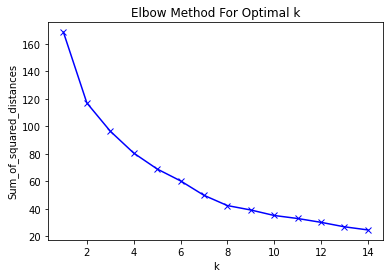

In [54]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [55]:
# Use n_clusters=5 as the k value

kmeans = KMeans(n_clusters=4, init='k-means++', n_init= 20, max_iter=600, algorithm = 'elkan')

In [56]:
# Fit the model to the data
model = kmeans.fit(features)

centroids = model.cluster_centers_
print(centroids)


[[0.2069426  0.33316262 0.34692171 0.18621819 0.17674427 0.18051402]
 [0.37059289 0.57925498 0.71426418 0.06949067 1.57826456 0.38521283]
 [0.9548194  1.6952346  2.04272261 0.05441092 0.39162392 0.56875597]
 [1.94254031 0.94982374 1.0549969  2.55965225 0.67764116 0.27373336]]


In [57]:
# Predict the clusters
predicted_clusters = kmeans.predict(features)

In [58]:
predicted_clusters

array([2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 1, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0,
       0, 0, 0, 2, 1])

In [59]:
len(predicted_clusters)

71

In [60]:
labels = pd.DataFrame(model.labels_)

labeleddata = pd.concat((desired_values,labels),axis=1, join='inner')

labeleddata = labeleddata.rename({0:'labels'},axis=1)

labeleddata



,index,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent,labels
0,1,Mexico,1.201176,1.828469,2.653280,0.435287,0.621554,0.334708,1.430827,2
1,3,Argentina,0.483524,0.658598,1.389759,0.326600,0.968414,0.015071,0.549965,1
2,5,Chile,0.669602,0.421959,0.189669,0.000000,0.544803,0.187647,0.290458,0
3,6,Colombia,0.074179,0.389781,0.393495,0.000000,1.346608,0.169958,0.316478,1
4,7,Ecuador,0.025358,0.274628,0.018496,0.000000,0.644383,0.000000,0.111964,0
...,...,...,...,...,...,...,...,...,...,...
66,76,Singapore,0.029494,1.697828,0.372854,0.000000,0.000000,0.017245,0.688333,0
67,78,Sri Lanka,0.025628,0.136203,0.000000,0.000000,0.126105,0.041575,0.073635,0
68,79,Taiwan,0.248029,1.074187,0.680673,1.250530,0.144849,1.075319,0.876211,0
69,80,Thailand,1.012236,1.512684,1.487559,0.000000,0.164855,0.470879,0.948735,2


In [61]:
labels

,0
0,2
1,1
2,0
3,1
4,0
...,...
66,0
67,0
68,0
69,2


In [62]:
label_series = pd.Series(predicted_clusters)
labels_combine = pd.concat([labels, label_series], axis=1 )

In [63]:

labels_combine

,0,0
0,2,2
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
66,0,0
67,0,0
68,0,0
69,2,2


In [64]:
len(labels)

71

In [65]:
len(labeleddata)

71

In [66]:
labeleddata.to_csv('multivariate__labeled_2019.csv', index=False)

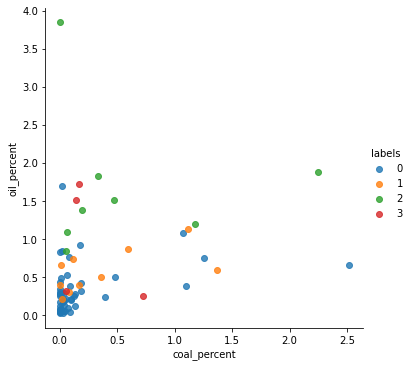

In [67]:
sns.lmplot(x='coal_percent',y='oil_percent',data=labeleddata,hue='labels',fit_reg=False)

In [68]:
labeleddata['Constant'] = "Data"
#This is just to add something constant for the strip/swarm plots' X axis. Can be anything you want it to be.

<AxesSubplot:xlabel='Constant', ylabel='coal_percent'>

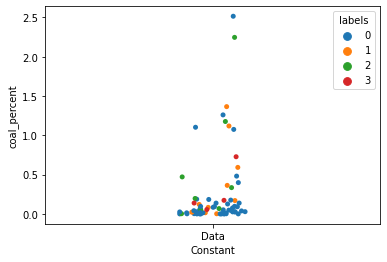

In [69]:
sns.stripplot(x=labeleddata['Constant'],y=labeleddata['coal_percent'],hue=labeleddata['labels'],jitter=True)

<AxesSubplot:xlabel='Constant', ylabel='coal_percent'>

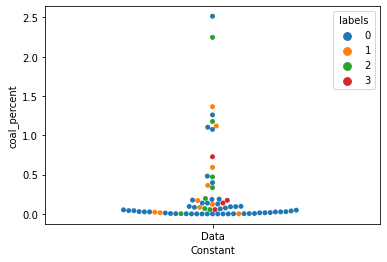

In [70]:
sns.swarmplot(x=labeleddata['Constant'],y=labeleddata['coal_percent'],hue=labeleddata['labels'])

In [71]:
# labeleddata.to_csv('diff_labeling_method_2000.csv', index=False)

## PCA

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
ccinfo_pca = pca.fit_transform(features)
pca.explained_variance_ratio_
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]
# Create the PCA DataFrame
ccinfo_pca_df = pd.DataFrame(
    ccinfo_pca,
    columns=["PCA1", "PCA2"]
)

In [73]:
# Review the PCA DataFrame
ccinfo_pca_df.head()

,PCA1,PCA2
0,2.371595,-0.725840
1,0.570433,-0.138057
2,-0.282816,0.144858
3,-0.405974,0.089565
4,-0.807570,0.033291


In [74]:
# kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=600, algorithm = 'auto')
# model = kmeans.fit(ccinfo_pca_df)
# labels = kmeans.predict(ccinfo_pca_df)

In [75]:
# ccinfo_pca_df["labels"] = labels

In [76]:
# labels

In [77]:
# conda install hvplot -y

In [78]:
# !conda install -c pyviz hvplot -y

In [79]:
# # Plot the clusters
# import hvplot.pandas
# ccinfo_pca_df.hvplot.scatter(
#     x="PCA1",
#     y="PCA2",
#     by="labels"
# )
# plt.show()

In [88]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=600, algorithm = 'auto')
model = kmeans.fit(ccinfo_pca_df)
pca_labels = kmeans.predict(ccinfo_pca_df)

In [89]:
ccinfo_pca_df["pca_labels"] = pca_labels

In [90]:
pca_labels

array([2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3,
       3, 3, 0, 3, 3, 3, 2, 2, 3, 3, 0, 3, 0, 0, 3, 2, 3, 2, 3, 0, 3, 0,
       3, 0, 3, 2, 0])

In [91]:
# Plot the clusters
import hvplot.pandas
ccinfo_pca_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="pca_labels"
)

:NdOverlay   [pca_labels]
   :Scatter   [PCA1]   (PCA2)

In [92]:
pca_series = pd.Series(pca_labels)

# pca_series.reset_index(drop=True, inplace=True)
# desired_values.reset_index(drop=True, inplace=True)

pca_2019 = pd.concat([desired_values, pca_series], axis=1) 


# pca_2000 = pd.concat([desired_values, pca_series], axis=1, join='inner', ignore_index=True)
# pca_2000.reset_index(drop=True, inplace=True)

pca_2019

,index,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent,0
0,1,Mexico,1.201176,1.828469,2.653280,0.435287,0.621554,0.334708,1.430827,2
1,3,Argentina,0.483524,0.658598,1.389759,0.326600,0.968414,0.015071,0.549965,3
2,5,Chile,0.669602,0.421959,0.189669,0.000000,0.544803,0.187647,0.290458,0
3,6,Colombia,0.074179,0.389781,0.393495,0.000000,1.346608,0.169958,0.316478,0
4,7,Ecuador,0.025358,0.274628,0.018496,0.000000,0.644383,0.000000,0.111964,0
...,...,...,...,...,...,...,...,...,...,...
66,76,Singapore,0.029494,1.697828,0.372854,0.000000,0.000000,0.017245,0.688333,3
67,78,Sri Lanka,0.025628,0.136203,0.000000,0.000000,0.126105,0.041575,0.073635,0
68,79,Taiwan,0.248029,1.074187,0.680673,1.250530,0.144849,1.075319,0.876211,3
69,80,Thailand,1.012236,1.512684,1.487559,0.000000,0.164855,0.470879,0.948735,2


In [93]:
# pca_2000.reset_index(drop=True, inplace=True)
# pca_2000

In [94]:

pca_2019 = pca_2019.rename(columns={0:'labels'})
pca_2019

,index,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent,labels
0,1,Mexico,1.201176,1.828469,2.653280,0.435287,0.621554,0.334708,1.430827,2
1,3,Argentina,0.483524,0.658598,1.389759,0.326600,0.968414,0.015071,0.549965,3
2,5,Chile,0.669602,0.421959,0.189669,0.000000,0.544803,0.187647,0.290458,0
3,6,Colombia,0.074179,0.389781,0.393495,0.000000,1.346608,0.169958,0.316478,0
4,7,Ecuador,0.025358,0.274628,0.018496,0.000000,0.644383,0.000000,0.111964,0
...,...,...,...,...,...,...,...,...,...,...
66,76,Singapore,0.029494,1.697828,0.372854,0.000000,0.000000,0.017245,0.688333,3
67,78,Sri Lanka,0.025628,0.136203,0.000000,0.000000,0.126105,0.041575,0.073635,0
68,79,Taiwan,0.248029,1.074187,0.680673,1.250530,0.144849,1.075319,0.876211,3
69,80,Thailand,1.012236,1.512684,1.487559,0.000000,0.164855,0.470879,0.948735,2


In [95]:
pca_2019.to_csv('pca_2019.csv', index=False)